# Sideband ground-state cooling

In [2]:
import matplotlib.pyplot as plt
import numpy as np

"""In order to provide a better presentation of the graphs we use the rcParams options shown below."""

import matplotlib
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (11.0, 8.0)

from numpy import cos, sin

label_size = 20

In [3]:
from numpy import sqrt

In [4]:
import time
from numba import jit
from numpy import sin, cos

T0=time.time()

# Parameters

In [301]:
#Initial State

Theta=np.pi/2
Phi  =0



#Parameters


N           = 100
Delta_mw    = 0.8     #Paper reference keeps this between 0 and 1.4
g_eff       = 4.536e-3
Gamma       = 2.578e-2
Gamma_tilde = 0.015
Omega_mw    = 0.8      #Paper reference keeps this between 0 and 1.4
omega_m     = 1        #KEEP THIS FIXED
gamma_m     = 5e-6
N_th        = 30


Angle_th    = 0



#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

Alpth_x=np.sqrt(N_th)*np.real(np.exp(1j*Angle_th))
Alpth_y=np.sqrt(N_th)*np.imag(np.exp(1j*Angle_th))

# Dynamics

In [302]:
t_final=10 *(  2*np.pi   )


In [303]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import sin, cos, sqrt

"""In order to provide a better presentation of the graphs we use the rcParams options shown below."""

import matplotlib
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (11.0, 8.0)

from numpy import sqrt

import time
from numba import jit




from scipy.sparse import identity
from scipy.sparse import lil_matrix
from scipy.sparse import csr_matrix


# Definition of Dicke-Generalized States

import numpy as np
from numpy import sqrt
import matplotlib.pyplot as plt


#--------------------------------------

State_List=[]

import scipy.special





import time 

import itertools
from itertools import permutations
from numba import jit


## Here Finishes Liouvillian Solution

In [304]:
pip install sdeint

In [305]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import random, zeros, sqrt,cos,sin

import matplotlib.pyplot as plt
import numpy as np
import sdeint
import time
from sdeint import itoint, stratint, itoSRI2, stratKP2iS,itoEuler
from numba import jit
import numbers

from numpy import sqrt, zeros, diag, random, real, array, complex_, transpose, conjugate, exp, matmul, real


import matplotlib
import matplotlib.pyplot as plt

In [306]:
import matplotlib.pyplot as plt
import numpy as np

"""In order to provide a better presentation of the graphs we use the rcParams options shown below."""

import matplotlib
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (11.0, 8.0)

In [341]:

theta = Theta
phi   = Phi


steps1=50000
tf=t_final
t_alt = np.linspace(0,tf,steps1)

print(tf/steps1,N*Gamma *t_final)

0.0012566370614359172 161.98051721908976


In [342]:
steps1

50000

In [359]:
matrix_array=[]

# X matrix


f10x=zeros((2, 2),dtype=complex_)
f10x[0][1]=(1/sqrt(2))
f10x=f10x+transpose(f10x)
matrix_array.append(f10x)

#Y Matrix

f10y=zeros((2, 2),dtype=complex_)
f10y[0][1]=-1j*(1/sqrt(2))
f10y=f10y+conjugate(np.transpose(f10y))
matrix_array.append(f10y)


#Z matrix

f01z=np.zeros((2, 2),dtype=complex_)
f01z[0][0]=1/sqrt(2)
f01z[1][1]=-1/sqrt(2)
matrix_array.append(f01z)







#-----------------------------------------------------------------------------------------------------

Psi_0=zeros((2,1),dtype=complex_)
Psi_0[0][0]=cos(Theta/2)
Psi_0[1][0]=sin(Theta/2)*exp(1j*Phi)


Psi_0_adj=transpose(conjugate(Psi_0))

#--------------------------------

#Averages Vector

Miu=[]

for j in matrix_array:
    Miu.append(matmul(Psi_0_adj,matmul(j,Psi_0))[0][0])

    

Cov_mat=zeros((3, 3),dtype=complex_)

for i in range(3):
    for j in range(3):
        Cov_mat[i][j]=0.5*(matmul(Psi_0_adj,matmul( matmul(matrix_array[i],matrix_array[j])+matmul(matrix_array[j],matrix_array[i]),Psi_0))[0][0])-Miu[i]*Miu[j]        
        

Cov_mat_list=[]

for j in range(3):
    Cov_mat_list.append(list(real(Cov_mat[j])))    
    

from scipy import stats

In [360]:
Miu

[(0.7071067811865475+0j), 0j, (1.3401577416544657e-16+0j)]

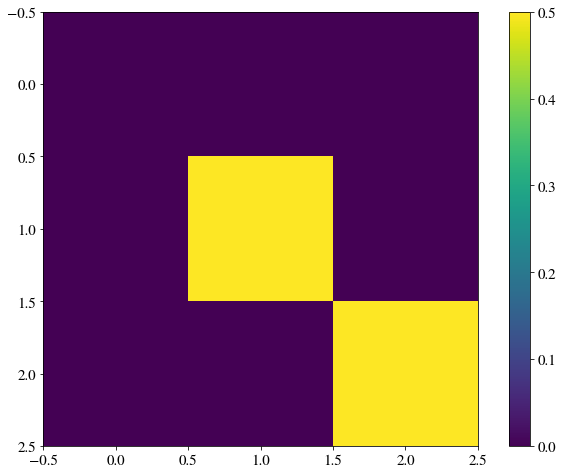

In [361]:
import numpy as np
import matplotlib.pyplot as plt

plt.imshow(np.real(Cov_mat))
plt.colorbar()
plt.show()

In [362]:
theta

1.5707963267948966

In [366]:
from scipy import stats
mk = np.array([-1,1])

xp= (0.5*(1-np.sin(theta)*np.cos(phi)),0.5*(1+np.sin(theta)*np.cos(phi)))
yp= (0.5*(1-np.sin(theta)*np.sin(phi)),0.5*(1+np.sin(theta)*np.sin(phi)))
zp = ((np.cos(theta/2))**2, (np.sin(theta/2))**2)


custmx = stats.rv_discrete(name='custmx', values=(mk, xp))
custmy = stats.rv_discrete(name='custmy', values=(mk, yp))
custmz = stats.rv_discrete(name='custmz', values=(mk, zp))



@jit

def f(y, t):
    
    Differential_eq =zeros((3*N+2, 1))
    
    alpha_x=y[3*N]
    alpha_y=y[3*N+1]
    
    Sgx=0
    Sgy=0
    Sgz=0
    
    for i in range(N): 
              
        sx_i=y[i]
        sy_i=y[i+N]
        sz_i=y[i+2*N]
        
        Sgx=Sgx+sx_i
        Sgy=Sgy+sy_i
        Sgz=Sgz+sz_i
        
        
        Differential_eq[i]     =  (Delta_mw-4*g_eff*alpha_x)*sy_i                -(Gamma/2+Gamma_tilde)*sx_i
        Differential_eq[i+N]   = -(Delta_mw-4*g_eff*alpha_x)*sx_i -Omega_mw*sz_i -(Gamma/2+Gamma_tilde)*sy_i
        Differential_eq[i+2*N] =                                   Omega_mw*sy_i -Gamma*(sz_i+1)
        
    Differential_eq[3*N  ]     =  omega_m*alpha_y                                -gamma_m*alpha_x/2
    Differential_eq[3*N+1]     = -(omega_m*alpha_x+g_eff*Sgz/2)                  -gamma_m*alpha_y/2
    
    return Differential_eq
    


Sqrt_Gamma_til = np.sqrt(Gamma_tilde)
Sqrt_Gamma     = np.sqrt(Gamma)
Sqrt_gamma_m   = np.sqrt(gamma_m)
sqrt2=np.sqrt(2)


Noise_cav=Sqrt_gamma_m *np.sqrt( (   N_th   +1   )/2 )

@jit

def fnoise(y, t):
    
    Differential_eq_noise =zeros((3*N+2, 1))
    
    alpha_x=y[3*N]
    alpha_y=y[3*N+1]
    
    for i in range(N): 
        
        
        sx_i=y[i]
        sy_i=y[i+N]
        sz_i=y[i+2*N]
        

        Wi_phi  = random.randn() #np.random.normal(0, 1) 
        W1i_dec = random.randn() #np.random.normal(0, 1) 
        W2i_dec = random.randn() #np.random.normal(0, 1) 

        Differential_eq_noise[i]     =  -sqrt2*Sqrt_Gamma_til*sy_i*Wi_phi-Sqrt_Gamma*( (sy_i+1)*W1i_dec +(sy_i-1)*W2i_dec   )/2
        Differential_eq_noise[i+N]   =   sqrt2*Sqrt_Gamma_til*sx_i*Wi_phi+Sqrt_Gamma*( (sx_i+1)*W1i_dec +(sx_i-1)*W2i_dec   )/2
        Differential_eq_noise[i+2*N] =   (Sqrt_Gamma/sqrt2)*(sz_i+1)*(W1i_dec-W2i_dec)

    W1_cav=random.randn() #np.random.normal(0, 1) 
    W2_cav=random.randn() #np.random.normal(0, 1)                                 
        
    Differential_eq_noise[3*N  ]     = Noise_cav*W1_cav
    Differential_eq_noise[3*N+1]     = Noise_cav*W2_cav
    
    return Differential_eq_noise

In [367]:
inv_frac=300

Major_index=int(steps1/inv_frac)
#New_column=zeros((steps1//Major_index, int(15*16/2)))
New_column=zeros((steps1//Major_index, int(30)))


print(steps1//Major_index)

301


In [368]:
def partit(number,array):
    j=0
    dis=len(array)
    result=[]
    while j*number<dis:
        result.append(array[j*number])
        j=j+1
    return result




t_reduced=np.zeros((1,steps1//Major_index))

for j in range(steps1//Major_index):
    t_reduced[0][j]=t_alt[Major_index*j]
    
    #for k in range(Ns//Major_index):
    #    y_reduced[k]=y[k*Major_index]
    
time_alt=t_reduced[0]


#  t_reduced[0] is the reduced time vector

# Mean-Field

In [319]:
Stochastic=0


@jit




def mfstratHeunImpII(f,y0, tspan):
    
    
    
    """Use the Euler-Maruyama algorithm to integrate the Ito equation
    dy = f(y,t)dt + G(y,t) dW(t)
    where y is the d-dimensional state vector, f is a vector-valued function,
    G is an d x m matrix-valued function giving the noise coefficients and
    dW(t) = (dW_1, dW_2, ... dW_m) is a vector of independent Wiener increments
    Args:
      f: callable(y, t) returning (d,) array
         Vector-valued function to define the deterministic part of the system
      G: callable(y, t) returning (d,m) array
         Matrix-valued function to define the noise coefficients of the system
      y0: array of shape (d,) giving the initial state vector y(t==0)
      tspan (array): The sequence of time points for which to solve for y.
        These must be equally spaced, e.g. np.arange(0,10,0.005)
        tspan[0] is the intial time corresponding to the initial state y0.
      dW: optional array of shape (len(tspan)-1, d). This is for advanced use,
        if you want to use a specific realization of the d independent Wiener
        processes. If not provided Wiener increments will be generated randomly
    Returns:
      y: array, with shape (len(tspan), len(y0))
         With the initial value y0 in the first row
    Raises:
      SDEValueError
    See also:
      G. Maruyama (1955) Continuous Markov processes and stochastic equations
      Kloeden and Platen (1999) Numerical Solution of Differential Equations
    """
    Ns = len(tspan)
    h = (tspan[Ns-1] - tspan[0])/(Ns - 1)
    # allocate space for result
    y = np.zeros((Ns, 3*N+2), dtype=type(y0[0]))

    y[0] = y0;

    
    for n in range(0, Ns-1):

             
        tn = tspan[n]
        tnp1 = tspan[n+1]
        yn = y[n].reshape(3*N+2,1)

        fn = f(yn, tn)
        y[n+1] = list((yn + fn*h).T[0])
        #fnbar = f(ybar, tnp1)

        #y[n+1] = list((yn + 0.5*(fn + fnbar)*h).T[0])   
            
            
            
            
            
            
            

    y_reduced=np.zeros((Ns//Major_index, 3*N+2), dtype=type(y0[0]))

    total_elements=3

    for k in range(Ns//Major_index):
        y_partial=y[k*Major_index]
        counter=1
        for ik_dex in range(1,total_elements):
            y_partial=y_partial+y[k*Major_index+ik_dex]
            counter=counter+1
            
        y_k=y_partial/counter

        y_reduced[k]   =y_k
        
    return y_reduced




@jit

def SDE_sol_mf():
    
    
    Results =zeros((3*N+2, 1))
    
    for j in range(N):
         
        a=custmx.rvs()
        b=custmy.rvs()
        c=custmz.rvs()
        
        Results[j][0]    =np.sqrt(2)*Miu[0]
        Results[j+N][0]  =np.sqrt(2)*Miu[1]
        Results[j+2*N][0]=np.sqrt(2)*Miu[2]
        
    Results[3*N][0]      =Alpth_x     #alpha_x initial
    Results[3*N+1][0]    =Alpth_y  #alpha_y initial
    
    y0=list((Results.T)[0])
    
    return mfstratHeunImpII(f, y0, t_alt)

In [320]:
import time

ty0=time.time()


Asd=SDE_sol_mf()   #.shape


ty1=time.time()

<ipython-input-319-74ed33486d99>:87: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "SDE_sol_mf" failed type inference due to: Untyped global name 'custmx': cannot determine Numba type of <class 'scipy.stats._distn_infrastructure.rv_sample'>

File "<ipython-input-319-74ed33486d99>", line 96:
def SDE_sol_mf():
    <source elided>
         
        a=custmx.rvs()
        ^

  @jit
<ipython-input-319-74ed33486d99>:87: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "SDE_sol_mf" failed type inference due to: cannot determine Numba type of <class 'numba.core.dispatcher.LiftedLoop'>

File "<ipython-input-319-74ed33486d99>", line 94:
def SDE_sol_mf():
    <source elided>
    
    for j in range(N):
    ^

  @jit
/usr/local/lib/python3.7/dist-packages/numba/core/object_mode_passes.py:178: NumbaWarning: Function "SDE_sol_mf" was compiled in object mode without forceobj=True, but has lifte

In [321]:
Asd.shape

(301, 302)

(-5.935050614058325, 6.144217163025384, -6.051197500904928, 6.0527997620368)

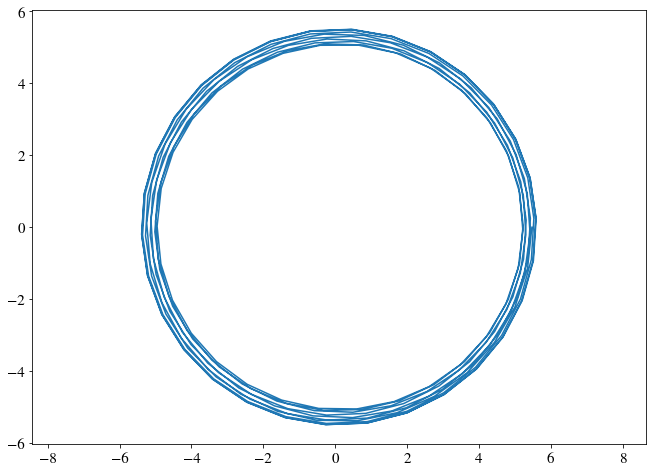

In [322]:
plt.plot(Asd[:, -2],Asd[:, -1])
plt.axis('equal')

(0.002479897779083702,
 1.0474639697034165,
 -0.699582377456408,
 0.669559116037999)

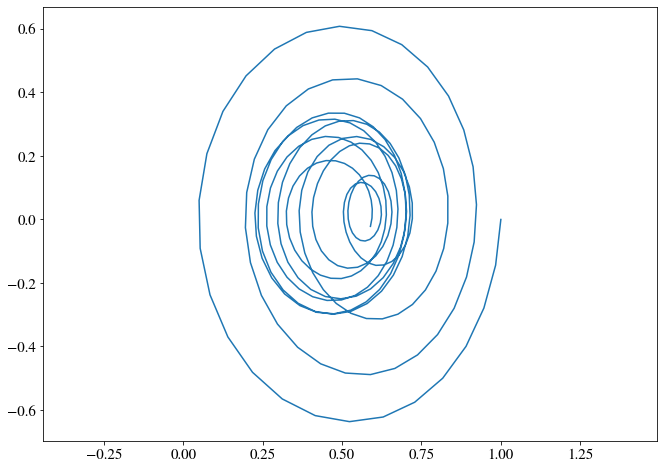

In [323]:
plt.plot(Asd[:, 0],Asd[:, N])
plt.axis('equal')

(0.002479897779083702,
 1.0474639697034165,
 -1.0077121926240824,
 0.047952046704171636)

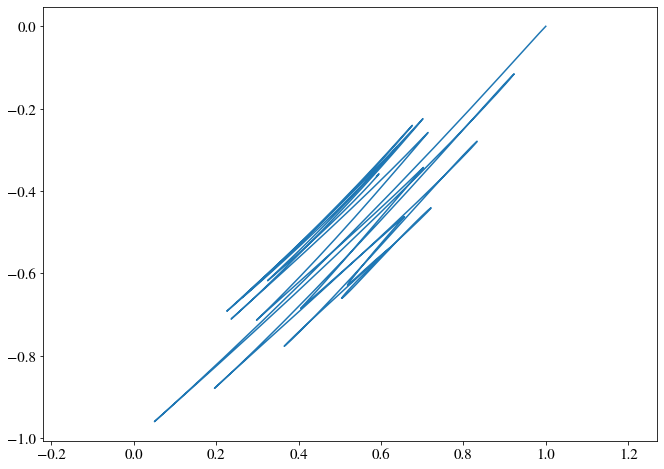

In [324]:
plt.plot(Asd[:, 0],Asd[:, 2*N])
plt.axis('equal')

(-0.699582377456408,
 0.669559116037999,
 -1.0077121926240824,
 0.047952046704171636)

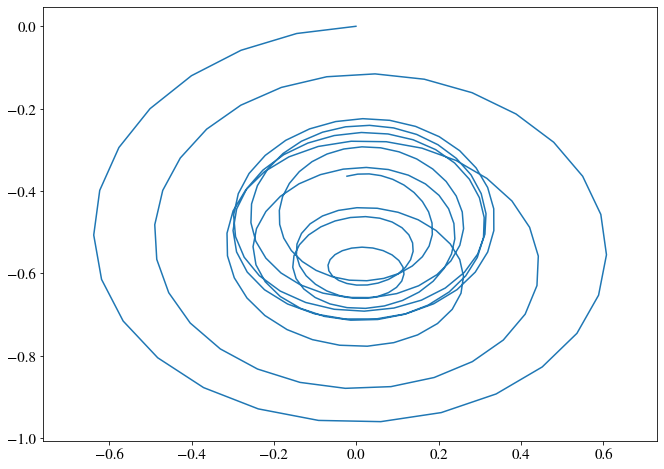

In [325]:
plt.plot(Asd[:, N],Asd[:, 2*N])
plt.axis('equal')

In [326]:
print(ty1-ty0)

108.85070204734802


(0.002479897779083702, 1.0474639697034165, -6.051197500904928, 6.0527997620368)

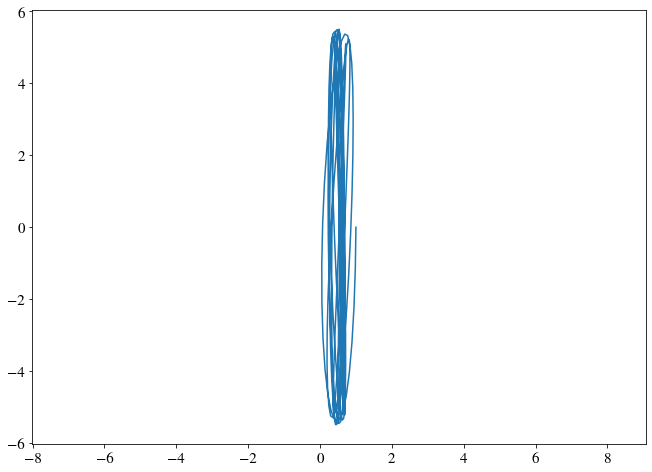

In [327]:
plt.plot(Asd[:, 0],Asd[:, -1])
plt.axis('equal')

In [328]:
Alpha_fin=(Asd[:, -1][-1]**2+Asd[:, -2][-1]**2)**0.5

Alpha_fin

5.599060186274294

### Mean field finishes here

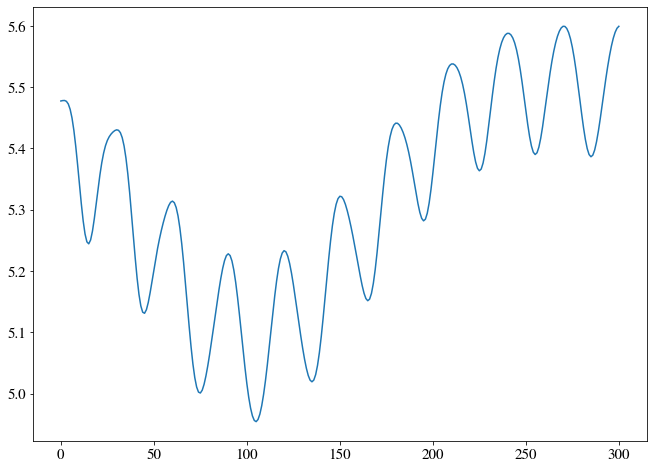

In [329]:
plt.plot((Asd[:, -1]**2+Asd[:, -2]**2)**0.5)

# TWA

In [335]:
Stochastic=0


@jit




def TWAstratHeunImp(f,y0, tspan):
    
    
    
    """Use the Euler-Maruyama algorithm to integrate the Ito equation
    dy = f(y,t)dt + G(y,t) dW(t)
    where y is the d-dimensional state vector, f is a vector-valued function,
    G is an d x m matrix-valued function giving the noise coefficients and
    dW(t) = (dW_1, dW_2, ... dW_m) is a vector of independent Wiener increments
    Args:
      f: callable(y, t) returning (d,) array
         Vector-valued function to define the deterministic part of the system
      G: callable(y, t) returning (d,m) array
         Matrix-valued function to define the noise coefficients of the system
      y0: array of shape (d,) giving the initial state vector y(t==0)
      tspan (array): The sequence of time points for which to solve for y.
        These must be equally spaced, e.g. np.arange(0,10,0.005)
        tspan[0] is the intial time corresponding to the initial state y0.
      dW: optional array of shape (len(tspan)-1, d). This is for advanced use,
        if you want to use a specific realization of the d independent Wiener
        processes. If not provided Wiener increments will be generated randomly
    Returns:
      y: array, with shape (len(tspan), len(y0))
         With the initial value y0 in the first row
    Raises:
      SDEValueError
    See also:
      G. Maruyama (1955) Continuous Markov processes and stochastic equations
      Kloeden and Platen (1999) Numerical Solution of Differential Equations
    """
    Ns = len(tspan)
    h = (tspan[Ns-1] - tspan[0])/(Ns - 1)
    # allocate space for result
    y = np.zeros((Ns, 3*N+2), dtype=type(y0[0]))

    y[0] = y0;

    
    for n in range(0, Ns-1):

             
        tn = tspan[n]
        tnp1 = tspan[n+1]
        yn = y[n].reshape(3*N+2,1)

        fn = f(yn, tn)
        y[n+1] = list((yn + fn*h).T[0])
        #fnbar = f(ybar, tnp1)

        #y[n+1] = list((yn + 0.5*(fn + fnbar)*h).T[0])   
            
            
            
            
            
            
            

    y_reduced=np.zeros((Ns//Major_index, 3*N+2), dtype=type(y0[0]))

    total_elements=3

    for k in range(Ns//Major_index):
        y_partial=y[k*Major_index]
        counter=1
        for ik_dex in range(1,total_elements):
            y_partial=y_partial+y[k*Major_index+ik_dex]
            counter=counter+1
            
        y_k=y_partial/counter

        y_reduced[k]   =y_k
        
    return y_reduced




@jit

def SDE_sol_TWA():
    
    
    Results =zeros((3*N+2, 1))
    
    for j in range(N):
         
        a=custmx.rvs()
        b=custmy.rvs()
        c=custmz.rvs()
        
        Results[j][0]    =a 
        Results[j+N][0]  =b
        Results[j+2*N][0]=c
    
    
    Results[3*N][0]  =random.normal(Alpth_x, 0.5)  #alpha_x initial
    Results[3*N+1][0]=random.normal(Alpth_y, 0.5)  #alpha_y initial
    
    y0=list((Results.T)[0])
    
    return TWAstratHeunImp(f, y0, t_alt)

In [336]:


from numpy import add
from numba import jit



itera=5000
@jit

def averages_sde(itera=itera):
    Results =SDE_sol_TWA()
    
    print(0)

    for j in range(itera-1):
        Trayec=SDE_sol_TWA()
        Results  =add(Results  ,Trayec)

        print(j+1)
    
    return Results/itera

In [337]:
import time
t0=time.time()

itera=10

Result_varTWA = averages_sde(itera=itera)
#Result_varTWA_Col_TWA = averages_sde(itera=itera,N=N)


t1=time.time()

print(t1-t0)

<ipython-input-336-2fc3bafd1bab>:9: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "averages_sde" failed type inference due to: Invalid use of type(CPUDispatcher(<function SDE_sol_TWA at 0x7f46669d6050>)) with parameters ()

During: resolving callee type: type(CPUDispatcher(<function SDE_sol_TWA at 0x7f46669d6050>))
During: typing of call at <ipython-input-336-2fc3bafd1bab> (12)


File "<ipython-input-336-2fc3bafd1bab>", line 12:
def averages_sde(itera=itera):
    Results =SDE_sol_TWA()
    ^

  @jit
<ipython-input-336-2fc3bafd1bab>:9: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "averages_sde" failed type inference due to: cannot determine Numba type of <class 'numba.core.dispatcher.LiftedLoop'>

File "<ipython-input-336-2fc3bafd1bab>", line 16:
def averages_sde(itera=itera):
    <source elided>

    for j in range(itera-1):
    ^

  @jit
/usr/local/lib/python3.7/dist-package

0


<ipython-input-336-2fc3bafd1bab>:9: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "averages_sde" failed type inference due to: Invalid use of type(CPUDispatcher(<function SDE_sol_TWA at 0x7f46669d6050>)) with parameters ()

During: resolving callee type: type(CPUDispatcher(<function SDE_sol_TWA at 0x7f46669d6050>))
During: typing of call at <ipython-input-336-2fc3bafd1bab> (17)


File "<ipython-input-336-2fc3bafd1bab>", line 17:
def averages_sde(itera=itera):
    <source elided>
    for j in range(itera-1):
        Trayec=SDE_sol_TWA()
        ^

  @jit
/usr/local/lib/python3.7/dist-packages/numba/core/object_mode_passes.py:178: NumbaWarning: Function "averages_sde" was compiled in object mode without forceobj=True.

File "<ipython-input-336-2fc3bafd1bab>", line 16:
def averages_sde(itera=itera):
    <source elided>

    for j in range(itera-1):
    ^

  state.func_ir.loc))
/usr/local/lib/python3.7/dist-packages/numba/core/object

1
2
3
4
5
6
7
8
9
953.61980676651


In [338]:
(Result_varTWA[:, 2*N]).shape

(301,)

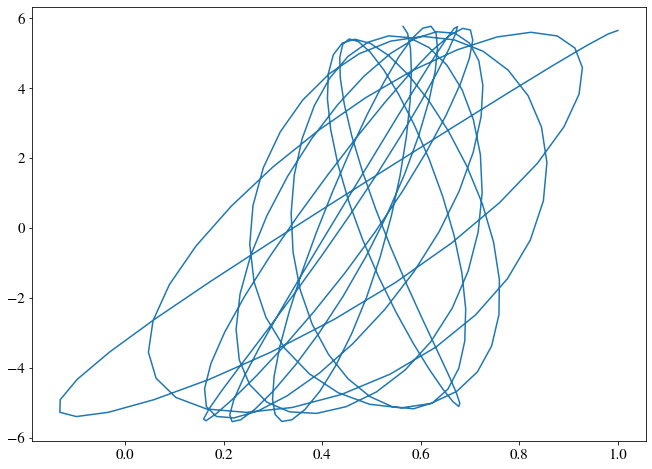

In [339]:
plt.plot(Result_varTWA[:, 0],Result_varTWA[:, -2])

(-6.241352531094594, 6.24233491656978, -6.111004007604557, 6.318500288148036)

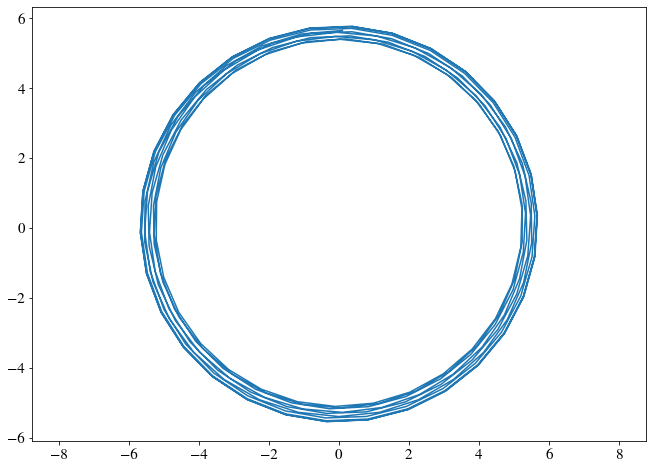

In [340]:
plt.plot(Result_varTWA[:, -1],Result_varTWA[:, -2])
plt.axis('equal')

# DissTWA

In [370]:



@jit




def DissTWA(f,y0, tspan):
    
    
    
    """Use the Euler-Maruyama algorithm to integrate the Ito equation
    dy = f(y,t)dt + G(y,t) dW(t)
    where y is the d-dimensional state vector, f is a vector-valued function,
    G is an d x m matrix-valued function giving the noise coefficients and
    dW(t) = (dW_1, dW_2, ... dW_m) is a vector of independent Wiener increments
    Args:
      f: callable(y, t) returning (d,) array
         Vector-valued function to define the deterministic part of the system
      G: callable(y, t) returning (d,m) array
         Matrix-valued function to define the noise coefficients of the system
      y0: array of shape (d,) giving the initial state vector y(t==0)
      tspan (array): The sequence of time points for which to solve for y.
        These must be equally spaced, e.g. np.arange(0,10,0.005)
        tspan[0] is the intial time corresponding to the initial state y0.
      dW: optional array of shape (len(tspan)-1, d). This is for advanced use,
        if you want to use a specific realization of the d independent Wiener
        processes. If not provided Wiener increments will be generated randomly
    Returns:
      y: array, with shape (len(tspan), len(y0))
         With the initial value y0 in the first row
    Raises:
      SDEValueError
    See also:
      G. Maruyama (1955) Continuous Markov processes and stochastic equations
      Kloeden and Platen (1999) Numerical Solution of Differential Equations
    """
    Ns = len(tspan)
    h = (tspan[Ns-1] - tspan[0])/(Ns - 1)
    # allocate space for result
    y = np.zeros((Ns, 3*N+2), dtype=type(y0[0]))

    y[0] = y0;

    
    for n in range(0, Ns-1):

             
        tn = tspan[n]
        tnp1 = tspan[n+1]
        yn = y[n].reshape(3*N+2,1)

        fn = f(yn, tn)
        sde_n=fnoise(yn, tn)

        sqrt_h=np.sqrt(h)



        y[n+1] = list((yn + fn*h+sqrt_h*sde_n).T[0])

    y_reduced=np.zeros((Ns//Major_index, 3*N+2), dtype=type(y0[0]))

    total_elements=4

    for k in range(Ns//Major_index):
        y_partial=y[k*Major_index]
        counter=1
        for ik_dex in range(1,total_elements):
            y_partial=y_partial+y[k*Major_index+ik_dex]
            counter=counter+1
            
        y_k=y_partial/counter

        y_reduced[k]   =y_k
        
    return y_reduced




@jit

def SDE_sol_DissTWA():
    
    
    Results =zeros((3*N+2, 1))
    
    for j in range(N):
         
        a=custmx.rvs()
        b=custmy.rvs()
        c=custmz.rvs()
        
        Results[j][0]    =a 
        Results[j+N][0]  =b
        Results[j+2*N][0]=c
    
    
    Results[3*N][0]  =random.normal(Alpth_x, 0.5)  #alpha_x initial
    Results[3*N+1][0]=random.normal(Alpth_y, 0.5)  #alpha_y initial
    
    y0=list((Results.T)[0])
    
    return DissTWA(f, y0, t_alt)

In [371]:


from numpy import add
from numba import jit



itera=5000
@jit

def averages_sde_DissTWA(itera=itera):
    Results =SDE_sol_DissTWA()
    
    print(0)

    for j in range(itera-1):
        Trayec=SDE_sol_DissTWA()
        Results  =add(Results  ,Trayec)

        print(j+1)
    
    return Results/itera

In [373]:
import time
t0=time.time()

itera=10

Result_var_DissTWA = averages_sde_DissTWA(itera=itera)
#Result_varTWA_Col_TWA = averages_sde(itera=itera,N=N)


t1=time.time()

print(t1-t0)

0
1
2
3
4
5
6
7
8
9
957.1205732822418


(-0.789822075411656, 1.2937888592084128, -6.108199243415357, 6.304319258543579)

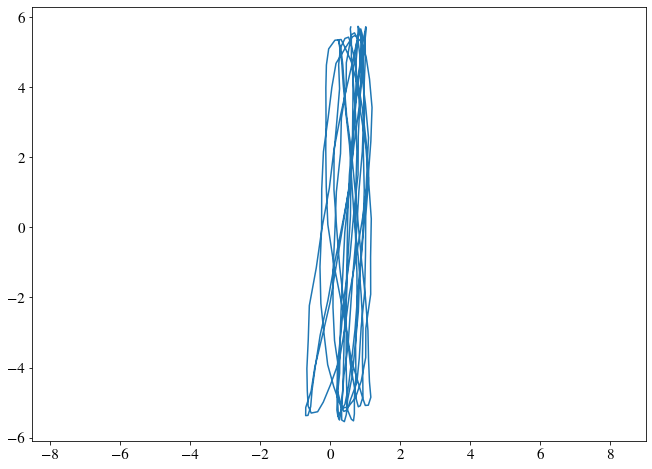

In [376]:
plt.plot(Result_var_DissTWA[:, 0],Result_var_DissTWA[:, -2])
plt.axis('equal')

(-6.235951318253563, 6.240854567094685, -6.108199243415357, 6.304319258543579)

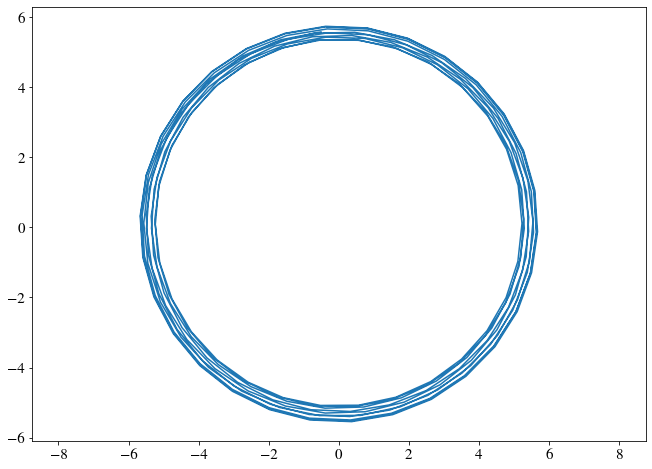

In [377]:
plt.plot(Result_var_DissTWA[:, -1],Result_var_DissTWA[:, -2])
plt.axis('equal')

(-6.241352531094594, 6.24233491656978, -6.111004007604557, 6.318500288148036)

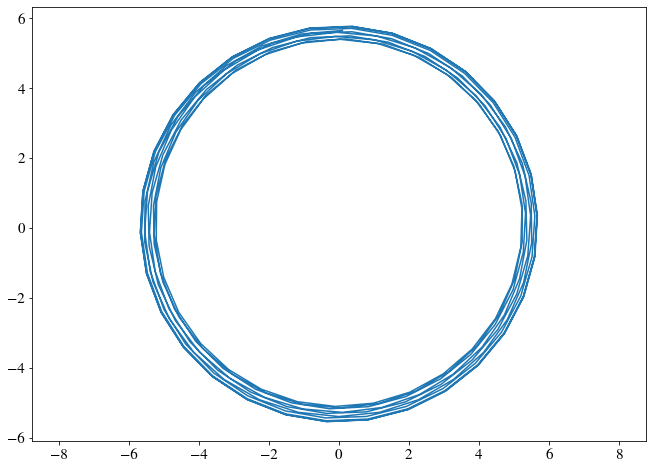

In [378]:
plt.plot(Result_varTWA[:, -1],Result_varTWA[:, -2])
plt.axis('equal')